In [62]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [63]:
pima = np.genfromtxt('logistic_regression/pima-indians-diabetes.data', \
                     delimiter=',')
X = pima[:,0:8]
Y = pima[:,8]
X = np.concatenate((np.ones((X.shape[0], 1)), pima[:, 0:8]), axis=1)
n, p = X.shape

In [64]:
import scipy.linalg as la

In [65]:
def E(A, u0, v0, u, v):
    """Total energy."""
    return (u0 @ tau @ u0 + v0 @ v0) - (u @ tau@u + v @ v)

In [66]:
def leapfrog(A, u, v, h, N):
    """Leapfrog finite difference scheme."""
    v = v - h/2 * A @ u
    for i in range(N-1):
        u = u + h * v
        v = v - h * A @ u

    u = u + h * v
    v = v - h/2 * A @ u

    return u, v

In [67]:
niter = 100
h = 0.01
N = 100

tau = la.inv(sigma)

orbit = np.zeros((niter+1, p))
u = np.zeros(9)
orbit[0] = u
for k in range(niter):
    v0 = np.random.normal(0,1,9)
    u, v = leapfrog(tau, u, v0, h, N)

    # accept-reject
    u0 = orbit[k]
    a = np.exp(E(A, u0, v0, u, v))
    r = np.random.rand()

    if r < a:
        orbit[k+1] = u
    else:
        orbit[k+1] = u0

ValueError: shapes (2,2) and (9,) not aligned: 2 (dim 1) != 9 (dim 0)

In [60]:
v0 = np.random.normal(0,1,2)
v0

array([-0.741561  , -0.35063131])

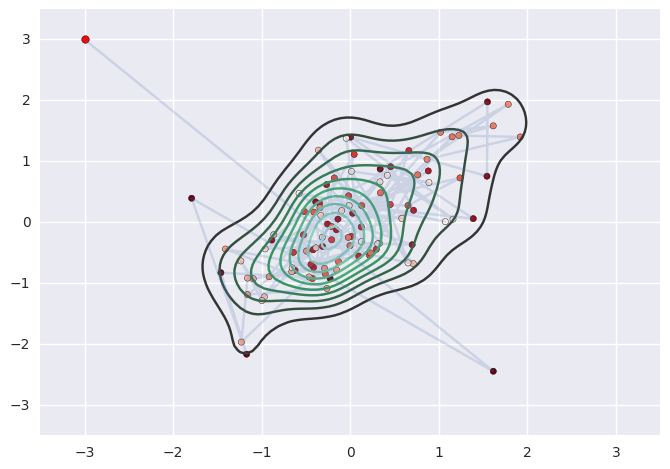

In [58]:
sns.kdeplot(orbit)
plt.plot(orbit[:,0], orbit[:,1], alpha=0.2)
plt.scatter(orbit[:1,0], orbit[:1,1],  c='red', s=30)
plt.scatter(orbit[1:,0], orbit[1:,1],  c=np.arange(niter)[::-1], cmap='Reds')
plt.axis([-3.5,3.5,-3.5,3.5])
pass